In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import numpy as np
import matplotlib.pyplot as plt
import CalHMM
import warnings
warnings.filterwarnings('ignore')
import HMMCrossValid as hcv

In [11]:
import hmmlearn.hmm

In [6]:
import imp

In [24]:
imp.reload(hcv)

<module 'HMMCrossValid' from '/Users/daiyiluo/Documents/ELEC599/HMMCrossValid.py'>

In [67]:
folder = '/Users/daiyiluo/Downloads/KQ086_210112/spks10' #KQ095_210205' #
timebin = 500
name = 'Spike'
n_chunks = 6
k = 2
win = 2

In [68]:
self = hcv.datainfo(folder, timebin, name, n_chunks, k, win,normalize=False)
self.mode = 'HMM'
self.name, self.folder, self.mode

('Spike', '/Users/daiyiluo/Downloads/KQ086_210112/spks10', 'HMM')

In [46]:
plt.plot(self.Trace0[:,2])

In [8]:
self.lap_range,self.n_laps_perchunk

([[0, 32], [16, 48], [32, 64], [48, 80], [64, 96]], 32)

In [ ]:
%matplotlib inline

In [ ]:
for i in range(self.Trace_train.shape[1]):
    plt.plot(self.Trace_train[:,i]/np.max(self.Trace_train[:,i])+i)
    
plt.xlabel('time')
plt.ylabel('neuron')
plt.title('Calcium Traces')

In [ ]:
self.Trace0.shape

# HMM cross validation

In [49]:
if self.mode == 'HMM':
    self.HMMSetCrossValid(text=True,plot=True, del_salstate=True)
#     HMMSetCrossValid(self, text = True, plot = False, random = True, shuffle = None, del_salstate=False)
elif self.mode == 'GP':
    self.GaussianSetCrossValid(text=True,plot=True)

Train chunk: 0
Laps in train set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
Train set: chunk 0 set [1]

train trace shape: (326, 184)


         1      -80586.2998             +nan
         2      -75040.2036       +5546.0962
         3      -73768.7069       +1271.4967
         4      -73199.7794        +568.9276
         5      -73067.9984        +131.7809
         6      -72946.7150        +121.2834
         7      -72765.8333        +180.8817
         8      -72738.2504         +27.5829
         9      -72760.2806         -22.0302
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [ 6  9 14  3 41  1  1 40  4 17  1  1 41  2 51 43 24 20  1  6]
logprob_n: -223.19104472656457, length: 326
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 184)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 184)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 184)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 184)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 184)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 184)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 184)
T

         1      -61568.8131             +nan
         2      -57714.0291       +3854.7840
         3      -57191.5344        +522.4947
         4      -56696.0066        +495.5277
         5      -56698.0831          -2.0765
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [ 3 27  1  5 39  1 11  3  1  3  1 16 30  2  6 25 17 47  4 51]
logprob_n: -193.5088160183373, length: 293
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 174)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 174)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 174)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 174)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 174)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 174)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 174)
Te

         1      -50573.4321             +nan
         2      -47341.2768       +3232.1553
         3      -46869.5153        +471.7615
         4      -46845.1637         +24.3515
         5      -46903.4885         -58.3248
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [32  3 10 14  2  1 10 14 36  2 24 39 23 10  1 16  2  2  1 32]
logprob_n: -171.18061511250215, length: 274
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 156)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 156)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 156)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 156)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 156)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 156)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 156)
T

         1      -49088.1694             +nan
         2      -45415.4106       +3672.7588
         3      -44665.9152        +749.4954
         4      -44444.4552        +221.4600
         5      -44248.8726        +195.5826
         6      -44271.0427         -22.1702
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [10 30 42  6 10 35  1  8 14  2 27  1  1 50  1 12  1  1  1  4]
logprob_n: -172.2608666445231, length: 257
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 151)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 151)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 151)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 151)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 151)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 151)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 151)
Te

         1      -45905.9631             +nan
         2      -42719.9959       +3185.9671
         3      -42102.2274        +617.7685
         4      -41786.4035        +315.8239
         5      -41609.1721        +177.2315
         6      -41542.2989         +66.8732
         7      -41525.5826         +16.7162
         8      -41416.3100        +109.2726
         9      -41451.1848         -34.8748
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [29 46  2 35  1  1 11  6 40  9  3  2  1 38  1  3  9  1 24  4]
logprob_n: -155.83152183563894, length: 266
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 135)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 135)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 135)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 135)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 135)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 135)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 135)
T

         1      -54539.4082             +nan
         2      -49344.5114       +5194.8968
         3      -48024.2850       +1320.2264
         4      -47770.7494        +253.5356
         5      -47708.2168         +62.5325
         6      -47749.0974         -40.8805
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [43 36  1 19 46  7  1  7 10 20  3 23  2  8  1 40  5  6  1  1]
logprob_n: -170.53249054241795, length: 280
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 165)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 165)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 165)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 165)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 165)
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 165)
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 165)
T

         1      -65334.7316             +nan
         2      -57743.1232       +7591.6084
         3      -54797.1700       +2945.9532
         4      -54232.2943        +564.8757
         5      -53922.8463        +309.4480
         6      -53567.3334        +355.5129
         7      -53575.0951          -7.7616
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [18 55 16  8  3  2  4 12  3  3  2  2  1  9  1 37  1 67  1 36]
logprob_n: -190.65870131841018, length: 281
Test set: chunk 3 set 0
Laps in test set: [72 57 71 80 67 82 77 60 56 78 75 51 65 81 61 68 69]
test trace shape: (325, 172)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 172)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 172)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 172)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 172)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 172)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 172)
T

         1      -91096.6444             +nan
         2      -76978.9192      +14117.7251
         3      -73554.6856       +3424.2336
         4      -72324.6573       +1230.0283
         5      -72110.7237        +213.9336
         6      -71709.7428        +400.9810
         7      -71674.2121         +35.5306
         8      -71638.5011         +35.7111
         9      -71473.8319        +164.6691
        10      -71362.9754        +110.8565
        11      -71365.2882          -2.3127
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [51 21  2 13 22  2  1  1 43  5  2  2 43  8 46 14 11  4 31  3]
logprob_n: -219.5855021159564, length: 325
Test set: chunk 3 set 1
Laps in test set: [64 55 74 70 53 83 58 54 73 76 52 63 84 66 62 79 59]
test trace shape: (281, 178)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 178)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 178)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 178)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 178)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 178)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace shape: (266, 178)
Te

         1      -80717.9994             +nan
         2      -74180.1283       +6537.8711
         3      -72468.1893       +1711.9389
         4      -71563.9051        +904.2842
         5      -70679.9765        +883.9286
         6      -70306.1243        +373.8522
         7      -70611.5143        -305.3899
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [22 27  2  2 12  5 43  5 27 55  7  1  4  2 37  7 62  4 10  5]
logprob_n: -208.29355243208173, length: 339
Test set: chunk 4 set 0
Laps in test set: [100  86  99  75  96  82  97  72  74  79  76  83  69  98  94  70  89]
test trace shape: (311, 182)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 182)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 182)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 182)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 182)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 182)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace sh

         1      -93337.8830             +nan
         2      -82088.7248      +11249.1582
         3      -79410.7697       +2677.9551
         4      -78141.8519       +1268.9178
         5      -77817.6447        +324.2072
         6      -77178.9594        +638.6853
         7      -76544.9388        +634.0206
         8      -76257.5254        +287.4134
         9      -76261.8458          -4.3204
The log probability of the last iteration decreased; reverting to previous state


[]
Decoded state counts: [18 21 18  1  4 11 26  2 73  2  1 15  3  3 36  1 14 10  1 51]
logprob_n: -245.21493813839226, length: 311
Test set: chunk 4 set 1
Laps in test set: [ 78  95  87  92  84  88  73  77  93  91  90 101  68  85  81  71  80]
test trace shape: (339, 185)
Test set: chunk 0 set 0
Laps in test set: [16 13 26 28 12 30  7  2 31 32 22 20 15 27 33 10  1]
test trace shape: (293, 185)
Test set: chunk 0 set 1
Laps in test set: [23  9 19 17  6 24  0 18  4 25  8 21  5 11 14 29  3]
test trace shape: (326, 185)
Test set: chunk 1 set 0
Laps in test set: [48 44 35 50 26 40 46 33 20 39 41 21 47 17 31 37 38]
test trace shape: (257, 185)
Test set: chunk 1 set 1
Laps in test set: [25 30 22 36 42 45 19 28 32 18 29 24 34 49 43 27 23]
test trace shape: (274, 185)
Test set: chunk 2 set 0
Laps in test set: [35 50 49 55 58 47 52 65 44 64 38 61 54 62 46 45 66]
test trace shape: (280, 185)
Test set: chunk 2 set 1
Laps in test set: [59 51 36 60 39 34 48 43 37 53 41 63 57 42 40 56 67]
test trace sh

___________ test end ______________

In [9]:
i_iter=0
while i_iter<5:
    try:
        if self.mode == 'HMM':
            self.HMMSetCrossValid(text=False, del_salstate=True)
        elif self.mode == 'GP':
            self.GaussianSetCrossValid(text=False)
        i_iter+=1
    except:
        print('failed')
        pass

Train chunk: 0
Laps in train set: [16 30 18 21 28 15  0  1 31 20  6 25  4 17  3 23]
train trace shape: (236, 98)


         1      -23800.8340             +nan
         2      -21837.5938       +1963.2402
         3      -21600.4575        +237.1363
         4      -21464.1760        +136.2815
         5      -21181.6301        +282.5459
         6      -20985.9853        +195.6448
         7      -20948.2394         +37.7459
         8      -20941.6455          +6.5939
         9      -20930.5347         +11.1108
        10      -20869.4659         +61.0688
        11      -20869.4654          +0.0005


[]
Decoded state counts: [99  6  2  2  1  5  3  5  1  6  4  1  1  2 76  2  8  7  4  1]
logprob_n: -88.4299380846102, length: 236
test trace shape: (239, 98)
test trace shape: (262, 98)
test trace shape: (273, 98)
test trace shape: (265, 98)
test trace shape: (273, 98)
test trace shape: (256, 98)
test trace shape: (262, 98)
test trace shape: (267, 98)
test trace shape: (258, 98)
Laps in train set: [29  9 22  7  2 12 27 24 19 13 14 26 10  8 11  5]
train trace shape: (239, 96)


         1      -23528.1890             +nan
         2      -20467.8201       +3060.3689
         3      -19726.7684        +741.0516
         4      -19607.8990        +118.8694
         5      -19518.2222         +89.6768
         6      -19496.8702         +21.3519
         7      -19438.4362         +58.4341
         8      -19387.6041         +50.8321
         9      -19387.6041          +0.0000


[]
Decoded state counts: [ 4 82  3  4  2  5 71  4 22  2  1  4  5  5  1  5  8  3  5  3]
logprob_n: -81.11968240948572, length: 239
test trace shape: (236, 96)
test trace shape: (262, 96)
test trace shape: (273, 96)
test trace shape: (265, 96)
test trace shape: (273, 96)
test trace shape: (256, 96)
test trace shape: (262, 96)
test trace shape: (267, 96)
test trace shape: (258, 96)
Train chunk: 1
Laps in train set: [22 18 20 40 25 32 26 43 35 24 34 46 29 27 23 36]
train trace shape: (273, 93)


         1      -23811.8687             +nan
         2      -21757.7094       +2054.1594
         3      -21244.7862        +512.9232
         4      -20993.0964        +251.6898
         5      -20969.0216         +24.0748
         6      -20881.0539         +87.9678
         7      -20801.5309         +79.5229
         8      -20785.6649         +15.8660
         9      -20785.4837          +0.1812
        10      -20757.0648         +28.4189
        11      -20741.4702         +15.5946
        12      -20733.9168          +7.5534
        13      -20723.7110         +10.2058
        14      -20716.2400          +7.4711
        15      -20716.2400          +0.0000


[]
Decoded state counts: [ 93   1   5   2  10   2   1   4   4   6   2   2   4   4   6   1   1   3
   4 118]
logprob_n: -75.88366293488447, length: 273
test trace shape: (262, 93)
test trace shape: (239, 93)
test trace shape: (236, 93)
test trace shape: (265, 93)
test trace shape: (273, 93)
test trace shape: (256, 93)
test trace shape: (262, 93)
test trace shape: (267, 93)
test trace shape: (258, 93)
Laps in train set: [17 44 21 41 28 31 45 47 38 30 42 39 16 37 19 33]
train trace shape: (262, 103)


         1      -29944.3219             +nan
         2      -27313.8550       +2630.4669
         3      -27036.9073        +276.9477
         4      -26873.0330        +163.8743
         5      -26842.3643         +30.6687
         6      -26842.3629          +0.0014


[]
Decoded state counts: [120   2   3   2   1   1   3   1   7  79   8   2   3   2  12   7   2   4
   1   2]
logprob_n: -102.4505395896463, length: 262
test trace shape: (273, 103)
test trace shape: (239, 103)
test trace shape: (236, 103)
test trace shape: (265, 103)
test trace shape: (273, 103)
test trace shape: (256, 103)
test trace shape: (262, 103)
test trace shape: (267, 103)
test trace shape: (258, 103)
Train chunk: 2
Laps in train set: [56 46 62 57 37 55 61 35 33 36 51 40 53 38 52 34]
train trace shape: (273, 97)


         1      -30424.1406             +nan
         2      -28070.1346       +2354.0060
         3      -27734.6878        +335.4468
         4      -27638.4348         +96.2530
         5      -27588.4401         +49.9946
         6      -27199.1013        +389.3388
         7      -27192.2069          +6.8944
         8      -27192.2036          +0.0033


[4]
Decoded state counts: [112   1   6   1  10   6   2  28   3   4   7  13   7  19   7   3  22  20
   2]
logprob_n: -99.60514148197456, length: 273
test trace shape: (265, 97)
test trace shape: (239, 97)
test trace shape: (236, 97)
test trace shape: (262, 97)
test trace shape: (273, 97)
test trace shape: (256, 97)
test trace shape: (262, 97)
test trace shape: (267, 97)
test trace shape: (258, 97)
Laps in train set: [44 58 63 43 39 49 54 45 42 47 60 48 32 41 50 59]
train trace shape: (265, 95)


         1      -21976.4440             +nan
         2      -20128.1271       +1848.3169
         3      -19705.3945        +422.7326
         4      -19544.8599        +160.5346
         5      -19497.8010         +47.0589
         6      -19430.3132         +67.4878
         7      -19426.0351          +4.2782
         8      -19426.0350          +0.0001


[]
Decoded state counts: [ 12  94   2   4   1   2   1   6   1   1   1   1   2   5   5 112   3   1
  10   1]
logprob_n: -73.30579242020106, length: 265
test trace shape: (273, 95)
test trace shape: (239, 95)
test trace shape: (236, 95)
test trace shape: (262, 95)
test trace shape: (273, 95)
test trace shape: (256, 95)
test trace shape: (262, 95)
test trace shape: (267, 95)
test trace shape: (258, 95)
Train chunk: 3
Laps in train set: [59 71 64 75 52 73 72 48 69 56 79 78 65 49 70 54]
train trace shape: (262, 101)


         1      -30406.8500             +nan
         2      -27503.8053       +2903.0447
         3      -27032.5159        +471.2894
         4      -26975.3431         +57.1729
         5      -26917.2088         +58.1343
         6      -26908.5366          +8.6722
         7      -26836.2480         +72.2886
         8      -26777.8356         +58.4124
         9      -26690.5221         +87.3136
        10      -26683.0967          +7.4253
        11      -26682.6492          +0.4475
        12      -26676.3578          +6.2914
        13      -26380.1548        +296.2030
        14      -25840.7318        +539.4230
        15      -25562.9674        +277.7644
        16      -25519.7858         +43.1816
        17      -25499.3225         +20.4633
        18      -25499.0579          +0.2646
        19      -25494.3381          +4.7198
        20      -25488.3933          +5.9447


[]
Decoded state counts: [  2 127   2   1   6   1   6   2   1   3   2   2   2  77   7   5   1   4
   5   6]
logprob_n: -97.28377573781168, length: 262
test trace shape: (256, 101)
test trace shape: (239, 101)
test trace shape: (236, 101)
test trace shape: (262, 101)
test trace shape: (273, 101)
test trace shape: (265, 101)
test trace shape: (273, 101)
test trace shape: (267, 101)
test trace shape: (258, 101)
Laps in train set: [60 61 53 68 76 50 63 55 51 74 58 57 62 67 66 77]
train trace shape: (256, 96)


         1      -24407.3087             +nan
         2      -22497.0075       +1910.3011
         3      -22238.3872        +258.6203
         4      -22160.5382         +77.8490
         5      -22153.2463          +7.2918
         6      -22136.6540         +16.5923
         7      -22119.1001         +17.5539
         8      -22118.3069          +0.7931
         9      -22118.3069          -0.0000
The log probability of the last iteration decreased; reverting to previous state


[1]
Decoded state counts: [ 23   1   1   1   2   1  12  14  14   4   3   5  24  16 116   2   7   4
   6]
logprob_n: -86.3996364489003, length: 256
test trace shape: (262, 96)
test trace shape: (239, 96)
test trace shape: (236, 96)
test trace shape: (262, 96)
test trace shape: (273, 96)
test trace shape: (265, 96)
test trace shape: (273, 96)
test trace shape: (267, 96)
test trace shape: (258, 96)
Train chunk: 4
Laps in train set: [69 77 80 88 92 94 64 74 79 86 73 72 75 65 85 83]
train trace shape: (258, 97)


         1      -26359.5890             +nan
         2      -24955.2488       +1404.3402
         3      -24730.1728        +225.0760
         4      -24653.2376         +76.9351
         5      -24653.2374          +0.0002


[0]
Decoded state counts: [ 11   9  11   1   1  11   9   1   6   5   4   3   2   4  12 154   1   8
   5]
logprob_n: -95.55518373300434, length: 258
test trace shape: (267, 97)
test trace shape: (239, 97)
test trace shape: (236, 97)
test trace shape: (262, 97)
test trace shape: (273, 97)
test trace shape: (265, 97)
test trace shape: (273, 97)
test trace shape: (256, 97)
test trace shape: (262, 97)
Laps in train set: [71 95 76 81 93 82 91 84 87 70 78 68 67 90 66 89]
train trace shape: (267, 103)


         1      -32783.9657             +nan
         2      -30184.9724       +2598.9933
         3      -29906.3293        +278.6431
         4      -29730.3504        +175.9789
         5      -29728.5539          +1.7965
         6      -29728.3717          +0.1822
         7      -29690.8385         +37.5332
         8      -29641.0151         +49.8234
         9      -29641.0135          +0.0016


[0]
Decoded state counts: [ 25   1   1   7   1  11  10 129   1   2   6  11   1   3   1   4  23  17
  13]
logprob_n: -111.01503103527851, length: 267
test trace shape: (258, 103)
test trace shape: (239, 103)
test trace shape: (236, 103)
test trace shape: (262, 103)
test trace shape: (273, 103)
test trace shape: (265, 103)
test trace shape: (273, 103)
test trace shape: (256, 103)
test trace shape: (262, 103)
============= 2 =============
Train chunk: 0
Laps in train set: [11 13 30  1 18 16  8 26  9 28 23 20 29 27  6  7]
train trace shape: (235, 96)


         1      -27516.1884             +nan
         2      -25067.0841       +2449.1043
         3      -24551.4815        +515.6026
         4      -24444.4692        +107.0123
         5      -24184.9841        +259.4851
         6      -23944.8314        +240.1527
         7      -23918.7001         +26.1313
         8      -23896.4891         +22.2110
         9      -23882.2417         +14.2474
        10      -23882.2416          +0.0000


[1]
Decoded state counts: [ 22 117   3   1   1   3  12   5   5   3   5   5  12   1   7   2   5  10
  16]
logprob_n: -101.55965675150242, length: 235
test trace shape: (240, 96)
test trace shape: (261, 96)
test trace shape: (274, 96)
test trace shape: (271, 96)
test trace shape: (267, 96)
test trace shape: (260, 96)
test trace shape: (258, 96)
test trace shape: (262, 96)
test trace shape: (263, 96)
Laps in train set: [ 4 12 10 31 15  3 25 21 17 19 24  0 22 14  5  2]
train trace shape: (240, 97)


         1      -26666.7791             +nan
         2      -23234.4501       +3432.3291
         3      -22749.7862        +484.6638
         4      -22728.2687         +21.5175
         5      -22727.2426          +1.0261
         6      -22719.8101          +7.4326
         7      -22719.1999          +0.6102
         8      -22719.1994          +0.0004


[]
Decoded state counts: [ 71   2   2   1   3   5   2   4   2   2   3   6   3   3 106   1   2   7
   5  10]
logprob_n: -94.64031032359615, length: 240
test trace shape: (235, 97)
test trace shape: (261, 97)
test trace shape: (274, 97)
test trace shape: (271, 97)
test trace shape: (267, 97)
test trace shape: (260, 97)
test trace shape: (258, 97)
test trace shape: (262, 97)
test trace shape: (263, 97)
Train chunk: 1
Laps in train set: [18 31 33 27 25 17 40 23 43 20 42 37 19 32 44 30]
train trace shape: (274, 101)


         1      -27472.3239             +nan
         2      -25486.6135       +1985.7104
         3      -25071.1556        +415.4579
         4      -24693.1482        +378.0074
         5      -24426.2680        +266.8803
         6      -24374.7414         +51.5266
         7      -24373.3807          +1.3606
         8      -24335.8617         +37.5191
         9      -24236.6097         +99.2519
        10      -24155.1385         +81.4712
        11      -24109.9388         +45.1998
        12      -24109.9386          +0.0002


[]
Decoded state counts: [113   1   1   2   1   6   1   7   2 107   2  11   2   2   6   1   1   2
   1   5]
logprob_n: -87.9924764901381, length: 274
test trace shape: (261, 101)
test trace shape: (240, 101)
test trace shape: (235, 101)
test trace shape: (271, 101)
test trace shape: (267, 101)
test trace shape: (260, 101)
test trace shape: (258, 101)
test trace shape: (262, 101)
test trace shape: (263, 101)
Laps in train set: [35 47 41 24 28 26 39 16 21 45 38 22 36 46 29 34]
train trace shape: (261, 94)


         1      -26856.9847             +nan
         2      -24492.7134       +2364.2713
         3      -23697.6370        +795.0764
         4      -23305.6520        +391.9850
         5      -23064.3789        +241.2731
         6      -22929.0634        +135.3155
         7      -22830.9139         +98.1495
         8      -22745.2427         +85.6713
         9      -22671.5779         +73.6648
        10      -22671.5776          +0.0002


[]
Decoded state counts: [ 2  1  2  3  3  3  2  4  1 98 11  6  1  4 10  3 10  1 90  6]
logprob_n: -86.86428217785036, length: 261
test trace shape: (274, 94)
test trace shape: (240, 94)
test trace shape: (235, 94)
test trace shape: (271, 94)
test trace shape: (267, 94)
test trace shape: (260, 94)
test trace shape: (258, 94)
test trace shape: (262, 94)
test trace shape: (263, 94)
Train chunk: 2
Laps in train set: [55 54 39 33 50 42 60 43 63 36 48 40 46 47 58 45]
train trace shape: (267, 95)


         1      -25192.3745             +nan
         2      -23297.3086       +1895.0660
         3      -23174.0181        +123.2905
         4      -23108.9336         +65.0844
         5      -23077.8029         +31.1307
         6      -23062.1792         +15.6237
         7      -23055.2896          +6.8896
         8      -23017.4890         +37.8006
         9      -22874.5642        +142.9247
        10      -22797.3868         +77.1774
        11      -22797.3868          +0.0000


[]
Decoded state counts: [  1 118   1   2   1   1   4   4   9   1   1   1   2   2   5 101   6   3
   2   2]
logprob_n: -85.38347106515906, length: 267
test trace shape: (271, 95)
test trace shape: (240, 95)
test trace shape: (235, 95)
test trace shape: (261, 95)
test trace shape: (274, 95)
test trace shape: (260, 95)
test trace shape: (258, 95)
test trace shape: (262, 95)
test trace shape: (263, 95)
Laps in train set: [34 35 59 53 38 57 37 49 32 52 61 51 62 44 41 56]
train trace shape: (271, 96)


         1      -25382.3648             +nan
         2      -22721.9445       +2660.4202
         3      -22169.4329        +552.5117
         4      -22118.1068         +51.3260
         5      -21874.5264        +243.5805
         6      -21823.9416         +50.5847
         7      -21813.5910         +10.3506
         8      -21792.0097         +21.5813
         9      -21786.2665          +5.7432
        10      -21784.1575          +2.1090
        11      -21767.6154         +16.5421
        12      -21767.5099          +0.1055
        13      -21767.5099          +0.0000


[]
Decoded state counts: [ 81   1   4   1   3   3   5   1   4   5   1   4   7   5   2 122   2   5
   7   8]
logprob_n: -80.3229146129073, length: 271
test trace shape: (267, 96)
test trace shape: (240, 96)
test trace shape: (235, 96)
test trace shape: (261, 96)
test trace shape: (274, 96)
test trace shape: (260, 96)
test trace shape: (258, 96)
test trace shape: (262, 96)
test trace shape: (263, 96)
Train chunk: 3
Laps in train set: [71 72 77 48 66 58 56 53 67 49 60 55 63 57 68 62]
train trace shape: (258, 90)


         1      -23570.7634             +nan
         2      -21524.1147       +2046.6486
         3      -21217.8063        +306.3084
         4      -21174.5642         +43.2421
         5      -21071.1528        +103.4114
         6      -20839.7810        +231.3718
         7      -20800.2523         +39.5288
         8      -20793.8454          +6.4068
         9      -20793.1280          +0.7175
        10      -20776.7033         +16.4247
        11      -20774.6152          +2.0881
        12      -20774.6151          +0.0001
         1      -30512.1522             +nan
         2      -28813.0937       +1699.0585


[]
Decoded state counts: [ 88   1   1   1   5   2   3   1   2   1   3   3   6   4   2   3 122   3
   1   6]
logprob_n: -80.52176394572706, length: 258
test trace shape: (260, 90)
test trace shape: (240, 90)
test trace shape: (235, 90)
test trace shape: (261, 90)
test trace shape: (274, 90)
test trace shape: (271, 90)
test trace shape: (267, 90)
test trace shape: (262, 90)
test trace shape: (263, 90)
Laps in train set: [52 59 76 73 54 78 70 75 79 64 65 61 69 50 51 74]
train trace shape: (260, 96)


         3      -28701.4472        +111.6465
         4      -28591.8924        +109.5548
         5      -28589.9821          +1.9103
         6      -28589.9821          +0.0000


[0]
Decoded state counts: [ 12   1  33   6   1   9 102  17   5  20   3   2  21   3  12   1   9   2
   1]
logprob_n: -109.9614694729425, length: 260
test trace shape: (258, 96)
test trace shape: (240, 96)
test trace shape: (235, 96)
test trace shape: (261, 96)
test trace shape: (274, 96)
test trace shape: (271, 96)
test trace shape: (267, 96)
test trace shape: (262, 96)
test trace shape: (263, 96)
Train chunk: 4
Laps in train set: [71 87 66 85 76 78 83 80 64 73 79 95 89 75 81 93]
train trace shape: (263, 100)


         1      -31949.0517             +nan
         2      -29746.6877       +2202.3640
         3      -29197.7521        +548.9356
         4      -28858.6799        +339.0722
         5      -28783.7607         +74.9193
         6      -28758.1443         +25.6163
         7      -28758.1443          +0.0000


[1]
Decoded state counts: [ 22   1   2   5  11   1   5  21   4   7   1   7  10  18  13   2  14   6
 113]
logprob_n: -109.34655638453492, length: 263
test trace shape: (262, 100)
test trace shape: (240, 100)
test trace shape: (235, 100)
test trace shape: (261, 100)
test trace shape: (274, 100)
test trace shape: (271, 100)
test trace shape: (267, 100)
test trace shape: (260, 100)
test trace shape: (258, 100)
Laps in train set: [92 82 86 74 72 68 84 90 70 65 77 88 91 94 67 69]
train trace shape: (262, 96)


         1      -21980.9613             +nan
         2      -19666.8092       +2314.1521
         3      -19347.6174        +319.1918
         4      -19119.8980        +227.7194
         5      -18769.3189        +350.5791
         6      -18538.2030        +231.1159
         7      -18530.6047          +7.5983
         8      -18530.6047          +0.0000


[]
Decoded state counts: [118   1   1   1   8   1  79   6   1   2   2  11   1   1   7   5   3   2
   1  11]
logprob_n: -70.72749879145105, length: 262
test trace shape: (263, 96)
test trace shape: (240, 96)
test trace shape: (235, 96)
test trace shape: (261, 96)
test trace shape: (274, 96)
test trace shape: (271, 96)
test trace shape: (267, 96)
test trace shape: (260, 96)
test trace shape: (258, 96)
============= 3 =============
Train chunk: 0
Laps in train set: [16 19 29 17 27 22 10  2 24 13 28 18  0 26 21 30]
train trace shape: (247, 98)


         1      -27705.2289             +nan
         2      -25193.0667       +2512.1623
         3      -24879.3957        +313.6710
         4      -24758.5447        +120.8510
         5      -24712.3897         +46.1550
         6      -24712.3887          +0.0010


[]
Decoded state counts: [  3 112   4   3   2   2   2   4   2   6   3   8  80   2   3   2   2   1
   5   1]
logprob_n: -100.05015681789332, length: 247
test trace shape: (228, 98)
test trace shape: (259, 98)
test trace shape: (276, 98)
test trace shape: (268, 98)
test trace shape: (270, 98)
test trace shape: (259, 98)
test trace shape: (259, 98)
test trace shape: (273, 98)
test trace shape: (252, 98)
Laps in train set: [14 31  4  9 20  8 11  5  6 15  3 23 25  1  7 12]
train trace shape: (228, 95)


         1      -24633.4388             +nan
         2      -22466.3593       +2167.0795
         3      -21760.5085        +705.8508
         4      -21625.5071        +135.0014
         5      -21496.6413        +128.8657
         6      -21495.1415          +1.4998
         7      -21486.0321          +9.1094
         8      -21415.3278         +70.7043
         9      -21330.6875         +84.6404
        10      -21156.3534        +174.3341
        11      -21155.2948          +1.0585
        12      -21155.2947          +0.0001


[]
Decoded state counts: [ 2  1 15 89  3  4  1  4  1 77  1  1  3  9  2  3  1  4  3  4]
logprob_n: -92.78635856302223, length: 228
test trace shape: (247, 95)
test trace shape: (259, 95)
test trace shape: (276, 95)
test trace shape: (268, 95)
test trace shape: (270, 95)
test trace shape: (259, 95)
test trace shape: (259, 95)
test trace shape: (273, 95)
test trace shape: (252, 95)
Train chunk: 1
Laps in train set: [47 38 23 24 42 44 27 43 17 19 31 35 40 33 32 46]
train trace shape: (276, 104)


         1      -26799.5807             +nan
         2      -24500.5701       +2299.0106
         3      -23919.6984        +580.8717
         4      -23680.8498        +238.8486
         5      -23581.1682         +99.6816
         6      -23525.3009         +55.8673
         7      -23484.4893         +40.8116
         8      -23483.8694          +0.6199
         9      -23483.8694          +0.0000


[]
Decoded state counts: [104   2   2   4   1   3   1   6   3   1   4   1   5   3   6   4 107   3
   7   9]
logprob_n: -85.0864833091032, length: 276
test trace shape: (259, 104)
test trace shape: (228, 104)
test trace shape: (247, 104)
test trace shape: (268, 104)
test trace shape: (270, 104)
test trace shape: (259, 104)
test trace shape: (259, 104)
test trace shape: (273, 104)
test trace shape: (252, 104)
Laps in train set: [20 41 26 36 45 22 25 21 30 18 28 29 34 16 37 39]
train trace shape: (259, 95)


         1      -26247.0415             +nan
         2      -23564.8662       +2682.1753
         3      -22916.2760        +648.5902
         4      -22781.0046        +135.2713
         5      -22773.5169          +7.4878
         6      -22773.4260          +0.0909
         7      -22773.1931          +0.2329
         8      -22772.1110          +1.0821
         9      -22770.9947          +1.1164
        10      -22770.9758          +0.0189
        11      -22770.9758          +0.0000
         1      -28383.9775             +nan


[11]
Decoded state counts: [14 64  5 12  1 17  1  1  3  3 10  9 11  4  5 88  1  2  8]
logprob_n: -87.91882539640089, length: 259
test trace shape: (276, 95)
test trace shape: (228, 95)
test trace shape: (247, 95)
test trace shape: (268, 95)
test trace shape: (270, 95)
test trace shape: (259, 95)
test trace shape: (259, 95)
test trace shape: (273, 95)
test trace shape: (252, 95)
Train chunk: 2
Laps in train set: [60 46 41 51 63 42 36 62 50 35 47 49 38 55 33 57]
train trace shape: (270, 98)


         2      -25847.1347       +2536.8428
         3      -25292.8485        +554.2862
         4      -24995.1906        +297.6578
         5      -24723.1956        +271.9950
         6      -24637.3306         +85.8649
         7      -24611.4036         +25.9270
         8      -24590.4894         +20.9142
         9      -24590.4894          +0.0000


[]
Decoded state counts: [  3  91   2   1   8   1   1   6   1   3   4 114   5   8   1   8   2   3
   2   6]
logprob_n: -91.07588679432348, length: 270
test trace shape: (268, 98)
test trace shape: (228, 98)
test trace shape: (247, 98)
test trace shape: (259, 98)
test trace shape: (276, 98)
test trace shape: (259, 98)
test trace shape: (259, 98)
test trace shape: (273, 98)
test trace shape: (252, 98)
Laps in train set: [61 44 58 59 39 43 32 37 40 56 48 52 53 34 45 54]
train trace shape: (268, 94)


         1      -22194.1355             +nan
         2      -20548.9131       +1645.2224
         3      -20425.2197        +123.6934
         4      -20299.9938        +125.2259
         5      -20284.2082         +15.7856
         6      -20284.2081          +0.0000


[]
Decoded state counts: [  3   1   1 111   5  10   2   1   1   4   4   1   1   5   2 108   2   2
   3   1]
logprob_n: -75.68734374364676, length: 268
test trace shape: (270, 94)
test trace shape: (228, 94)
test trace shape: (247, 94)
test trace shape: (259, 94)
test trace shape: (276, 94)
test trace shape: (259, 94)
test trace shape: (259, 94)
test trace shape: (273, 94)
test trace shape: (252, 94)
Train chunk: 3
Laps in train set: [58 64 51 66 74 56 69 62 71 65 63 52 55 59 77 68]
train trace shape: (259, 98)


         1      -24686.9983             +nan
         2      -23019.0013       +1667.9970
         3      -22878.5080        +140.4933
         4      -22814.6729         +63.8351
         5      -22676.0181        +138.6548
         6      -22676.0180          +0.0001


[5]
Decoded state counts: [128   1   9   1  18   3   8  13  19   5   4   5   2  16   2   8   3   3
  11]
logprob_n: -87.55219320324268, length: 259
test trace shape: (259, 98)
test trace shape: (228, 98)
test trace shape: (247, 98)
test trace shape: (259, 98)
test trace shape: (276, 98)
test trace shape: (268, 98)
test trace shape: (270, 98)
test trace shape: (273, 98)
test trace shape: (252, 98)
Laps in train set: [78 57 50 67 72 76 75 48 49 60 54 73 79 53 70 61]
train trace shape: (259, 98)


         1      -31348.1559             +nan
         2      -27657.7977       +3690.3582
         3      -27051.6341        +606.1636
         4      -26810.1736        +241.4605
         5      -26577.3336        +232.8399
         6      -26503.8357         +73.4979
         7      -26471.8297         +32.0060
         8      -26471.8297          +0.0000


[]
Decoded state counts: [  2 107   1   8   3   1   2   5  97   8   2   1   3   2   3   2   7   1
   2   2]
logprob_n: -102.2078367556738, length: 259
test trace shape: (259, 98)
test trace shape: (228, 98)
test trace shape: (247, 98)
test trace shape: (259, 98)
test trace shape: (276, 98)
test trace shape: (268, 98)
test trace shape: (270, 98)
test trace shape: (273, 98)
test trace shape: (252, 98)
Train chunk: 4
Laps in train set: [75 74 91 72 66 90 65 92 79 73 89 93 71 84 94 87]
train trace shape: (252, 94)


         1      -23629.4128             +nan
         2      -21814.6143       +1814.7985
         3      -21599.0640        +215.5503
         4      -21591.1489          +7.9151
         5      -21591.1489          +0.0000


[1]
Decoded state counts: [  6 104   2   1   5   6   1  25   1   2  30  13   7  21   6   1   7   8
   6]
logprob_n: -85.67916231662113, length: 252
test trace shape: (273, 94)
test trace shape: (228, 94)
test trace shape: (247, 94)
test trace shape: (259, 94)
test trace shape: (276, 94)
test trace shape: (268, 94)
test trace shape: (270, 94)
test trace shape: (259, 94)
test trace shape: (259, 94)
Laps in train set: [78 83 70 85 86 81 64 67 68 69 95 82 77 88 76 80]
train trace shape: (273, 103)


         1      -28880.3495             +nan
         2      -24733.0881       +4147.2614
         3      -24069.4591        +663.6290
         4      -23776.1597        +293.2994
         5      -23694.2961         +81.8635
         6      -23660.9354         +33.3607
         7      -23660.9351          +0.0003


[]
Decoded state counts: [ 13   2   2 121  73   3   1   2   5   4   2   1   7  13   1   7   4   5
   2   5]
logprob_n: -86.67009208896029, length: 273
test trace shape: (252, 103)
test trace shape: (228, 103)
test trace shape: (247, 103)
test trace shape: (259, 103)
test trace shape: (276, 103)
test trace shape: (268, 103)
test trace shape: (270, 103)
test trace shape: (259, 103)
test trace shape: (259, 103)
============= 4 =============
Train chunk: 0
Laps in train set: [ 7 18  8 10 15  6 30 16  0 20 27  2 23  4 11 28]
train trace shape: (228, 91)


         1      -25486.5659             +nan
         2      -23243.9293       +2242.6366
         3      -22808.5860        +435.3432
         4      -22689.0626        +119.5234
         5      -22684.7780          +4.2846
         6      -22630.3789         +54.3991
         7      -22614.9525         +15.4264
         8      -22512.9217        +102.0308
         9      -22509.1116          +3.8101
        10      -22490.0263         +19.0853
        11      -22490.0192          +0.0071


[]
Decoded state counts: [86  1  1  2  1  5  4  3  5  6  1 25  2  3  4  1 72  3  1  2]
logprob_n: -98.64043526596485, length: 228
test trace shape: (247, 91)
test trace shape: (263, 91)
test trace shape: (272, 91)
test trace shape: (264, 91)
test trace shape: (274, 91)
test trace shape: (280, 91)
test trace shape: (238, 91)
test trace shape: (260, 91)
test trace shape: (265, 91)
Laps in train set: [26 21 25 24  3 17 14  1 22 12 31 29  5  9 13 19]
train trace shape: (247, 95)


         1      -26844.4504             +nan
         2      -24270.3950       +2574.0554
         3      -23768.3310        +502.0640
         4      -23742.1100         +26.2211
         5      -23664.6265         +77.4835
         6      -23664.5344          +0.0921
         7      -23664.5318          +0.0026


[4]
Decoded state counts: [ 11   1   1   9   3   5   9   3  10  23   2   5  20   2   2  10   9 111
  11]
logprob_n: -95.80781921865278, length: 247
test trace shape: (228, 95)
test trace shape: (263, 95)
test trace shape: (272, 95)
test trace shape: (264, 95)
test trace shape: (274, 95)
test trace shape: (280, 95)
test trace shape: (238, 95)
test trace shape: (260, 95)
test trace shape: (265, 95)
Train chunk: 1
Laps in train set: [44 37 18 26 38 33 43 27 47 30 29 32 42 39 46 25]
train trace shape: (272, 97)


         1      -26806.0591             +nan
         2      -24759.1163       +2046.9428
         3      -24397.2160        +361.9003
         4      -24312.0411         +85.1749
         5      -24169.6382        +142.4029
         6      -24002.6889        +166.9493
         7      -24002.6889          +0.0000


[1]
Decoded state counts: [ 5  1  9  9  1 10  1 93  3  4 30  1 18  1  2  9 30 36  9]
logprob_n: -88.24517581037031, length: 272
test trace shape: (263, 97)
test trace shape: (247, 97)
test trace shape: (228, 97)
test trace shape: (264, 97)
test trace shape: (274, 97)
test trace shape: (280, 97)
test trace shape: (238, 97)
test trace shape: (260, 97)
test trace shape: (265, 97)
Laps in train set: [17 20 31 36 23 19 16 34 22 41 35 40 21 45 28 24]
train trace shape: (263, 100)


         1      -30633.2227             +nan
         2      -27824.8792       +2808.3435
         3      -27464.8367        +360.0424
         4      -27342.9305        +121.9062
         5      -27340.5784          +2.3521
         6      -27268.1040         +72.4744
         7      -27248.1465         +19.9575
         8      -27211.8379         +36.3086
         9      -27025.2393        +186.5986
        10      -27003.3874         +21.8519
        11      -26971.7684         +31.6191
        12      -26971.7682          +0.0001
         1      -24994.8165             +nan


[]
Decoded state counts: [  2 123   3   4   3   5   1   7   3   5   1   7   1   5   1   3   1  82
   1   5]
logprob_n: -102.55421612800427, length: 263
test trace shape: (272, 100)
test trace shape: (247, 100)
test trace shape: (228, 100)
test trace shape: (264, 100)
test trace shape: (274, 100)
test trace shape: (280, 100)
test trace shape: (238, 100)
test trace shape: (260, 100)
test trace shape: (265, 100)
Train chunk: 2
Laps in train set: [51 34 44 52 35 33 42 59 45 32 57 58 50 53 54 56]
train trace shape: (274, 100)


         2      -22361.4407       +2633.3758
         3      -21644.3511        +717.0895
         4      -21553.1197         +91.2314
         5      -21474.8861         +78.2336
         6      -21192.5381        +282.3480
         7      -21190.3320          +2.2061
         8      -21190.3291          +0.0029


[]
Decoded state counts: [  7  95   6   1   3   1   1   3   2   2   1   5   7   3   3 113   4   1
   4  12]
logprob_n: -77.3361641386484, length: 274
test trace shape: (264, 100)
test trace shape: (247, 100)
test trace shape: (228, 100)
test trace shape: (263, 100)
test trace shape: (272, 100)
test trace shape: (280, 100)
test trace shape: (238, 100)
test trace shape: (260, 100)
test trace shape: (265, 100)
Laps in train set: [48 46 36 40 49 63 55 62 43 38 39 37 60 61 47 41]
train trace shape: (264, 99)


         1      -24194.1844             +nan
         2      -22151.2806       +2042.9038
         3      -21544.3331        +606.9475
         4      -21242.5605        +301.7726
         5      -21153.4321         +89.1283
         6      -21077.4778         +75.9543
         7      -21077.4712          +0.0066


[]
Decoded state counts: [ 92   2   1   2   1   4   4   2   1   2   9   6   2   1   2   9 103  11
   1   9]
logprob_n: -79.83890579276175, length: 264
test trace shape: (274, 99)
test trace shape: (247, 99)
test trace shape: (228, 99)
test trace shape: (263, 99)
test trace shape: (272, 99)
test trace shape: (280, 99)
test trace shape: (238, 99)
test trace shape: (260, 99)
test trace shape: (265, 99)
Train chunk: 3
Laps in train set: [50 56 77 79 65 73 48 63 61 66 78 53 76 62 64 74]
train trace shape: (238, 91)


         1      -22763.4343             +nan
         2      -21798.4550        +964.9793
         3      -21749.1216         +49.3335
         4      -21725.3992         +23.7223
         5      -21725.3992          +0.0000


[0]
Decoded state counts: [ 10   1   1  14   8  18 116   2   3   3  21   9   1   7   7   1   9   2
   5]
logprob_n: -91.28318994501109, length: 238
test trace shape: (280, 91)
test trace shape: (247, 91)
test trace shape: (228, 91)
test trace shape: (263, 91)
test trace shape: (272, 91)
test trace shape: (264, 91)
test trace shape: (274, 91)
test trace shape: (260, 91)
test trace shape: (265, 91)
Laps in train set: [60 55 71 49 58 72 51 57 54 70 69 52 75 67 68 59]
train trace shape: (280, 101)


         1      -31326.5955             +nan
         2      -29517.7363       +1808.8592
         3      -29123.0243        +394.7120
         4      -29085.6676         +37.3567
         5      -28958.5490        +127.1186
         6      -28926.5110         +32.0380
         7      -28926.5110          +0.0000


[]
Decoded state counts: [122   3   1   4   6   1   1   1   2   2   4   3   2   2   5 110   2   1
   5   3]
logprob_n: -103.30896787187476, length: 280
test trace shape: (238, 101)
test trace shape: (247, 101)
test trace shape: (228, 101)
test trace shape: (263, 101)
test trace shape: (272, 101)
test trace shape: (264, 101)
test trace shape: (274, 101)
test trace shape: (260, 101)
test trace shape: (265, 101)
Train chunk: 4
Laps in train set: [89 66 90 79 83 70 65 87 93 69 85 84 94 68 81 67]
train trace shape: (265, 99)


         1      -29868.0144             +nan
         2      -27572.8683       +2295.1460
         3      -26911.5371        +661.3312
         4      -26499.1805        +412.3566
         5      -26447.5829         +51.5976
         6      -26433.5165         +14.0664
         7      -26405.9866         +27.5299
         8      -26385.9555         +20.0311
         9      -26385.9555          +0.0000


[]
Decoded state counts: [  7 105   1   2   1   4   8   1   2   2   5   3   1   2   2  93   3   9
   9   5]
logprob_n: -99.5696434436708, length: 265
test trace shape: (260, 99)
test trace shape: (247, 99)
test trace shape: (228, 99)
test trace shape: (263, 99)
test trace shape: (272, 99)
test trace shape: (264, 99)
test trace shape: (274, 99)
test trace shape: (280, 99)
test trace shape: (238, 99)
Laps in train set: [64 76 92 95 71 91 73 75 74 72 78 77 80 86 88 82]
train trace shape: (260, 97)


         1      -21375.3523             +nan
         2      -19613.9326       +1761.4197
         3      -19285.9141        +328.0185
         4      -19146.0368        +139.8773
         5      -19118.1941         +27.8427
         6      -19101.0714         +17.1227
         7      -19100.7163          +0.3551
         8      -19096.9189          +3.7974
         9      -19074.6256         +22.2933
        10      -18987.8560         +86.7696
        11      -18975.8144         +12.0416
        12      -18975.8144          +0.0000


[11]
Decoded state counts: [  6 117   1  95   1   1   3   2   1   4   1   6   3   2   1   1   1   8
   6]
logprob_n: -72.98390139428092, length: 260
test trace shape: (265, 97)
test trace shape: (247, 97)
test trace shape: (228, 97)
test trace shape: (263, 97)
test trace shape: (272, 97)
test trace shape: (264, 97)
test trace shape: (274, 97)
test trace shape: (280, 97)
test trace shape: (238, 97)
============= 5 =============
Train chunk: 0
Laps in train set: [ 9 28 31 18  1 29 24 17 15  2  3 13 10  4  7 12]
train trace shape: (236, 95)


         1      -23919.5644             +nan
         2      -21074.2128       +2845.3516
         3      -20607.9499        +466.2629
         4      -20539.2654         +68.6845
         5      -20436.5793        +102.6861
         6      -20398.4716         +38.1077
         7      -20398.4692          +0.0024


[]
Decoded state counts: [ 2 92  1  4  7  2  5  4  1  1  7  9  2  1  5  4  4 78  4  3]
logprob_n: -86.1868046550421, length: 236
test trace shape: (239, 95)
test trace shape: (279, 95)
test trace shape: (256, 95)
test trace shape: (281, 95)
test trace shape: (257, 95)
test trace shape: (254, 95)
test trace shape: (264, 95)
test trace shape: (269, 95)
test trace shape: (256, 95)
Laps in train set: [14 26  8 22 23  6 25 11  0 21 20 30 27 19 16  5]
train trace shape: (239, 97)


         1      -26002.7224             +nan
         2      -23099.3761       +2903.3462
         3      -22572.1727        +527.2035
         4      -22360.7588        +211.4139
         5      -22233.8706        +126.8882
         6      -22219.4891         +14.3815
         7      -22212.6412          +6.8479
         8      -22212.5960          +0.0451
         9      -22206.6495          +5.9465
        10      -22193.8904         +12.7592
        11      -22176.4733         +17.4171
        12      -22156.1103         +20.3630
        13      -22144.7090         +11.4013
        14      -22144.7073          +0.0017


[]
Decoded state counts: [  1  76   2   2   7   9   2   1   2   6   3   3   3 104   2   1   6   1
   7   1]
logprob_n: -92.65548814399205, length: 239
test trace shape: (236, 97)
test trace shape: (279, 97)
test trace shape: (256, 97)
test trace shape: (281, 97)
test trace shape: (257, 97)
test trace shape: (254, 97)
test trace shape: (264, 97)
test trace shape: (269, 97)
test trace shape: (256, 97)
Train chunk: 1
Laps in train set: [43 36 34 32 39 44 45 35 42 28 26 17 25 47 16 23]
train trace shape: (256, 92)


         1      -21131.8730             +nan
         2      -19330.4583       +1801.4146
         3      -19073.4707        +256.9876
         4      -18979.8198         +93.6509
         5      -18943.1151         +36.7047
         6      -18926.7486         +16.3664
         7      -18889.1776         +37.5711
         8      -18866.9925         +22.1851
         9      -18860.1639          +6.8285
        10      -18844.7007         +15.4633
        11      -18844.6581          +0.0425
        12      -18843.1920          +1.4661
        13      -18831.2563         +11.9357
        14      -18831.0300          +0.2263
        15      -18831.0300          +0.0000


[]
Decoded state counts: [102   3   1   3   5   2 100   1   5   1   5   7   1   6   3   1   4   2
   2   2]
logprob_n: -73.55871098461007, length: 256
test trace shape: (279, 92)
test trace shape: (239, 92)
test trace shape: (236, 92)
test trace shape: (281, 92)
test trace shape: (257, 92)
test trace shape: (254, 92)
test trace shape: (264, 92)
test trace shape: (269, 92)
test trace shape: (256, 92)
Laps in train set: [31 46 22 33 20 38 27 19 40 21 37 24 30 18 29 41]
train trace shape: (279, 101)


         1      -35020.6098             +nan
         2      -31752.8169       +3267.7928
         3      -31176.5801        +576.2368
         4      -30725.7130        +450.8671
         5      -30570.9674        +154.7456
         6      -30456.5304        +114.4371
         7      -30234.2227        +222.3077
         8      -30204.3827         +29.8400
         9      -30204.3827          +0.0000


[]
Decoded state counts: [  7 115   2   1   1   3   1   1   2   2   2   2   5   5 102   3   6   6
  12   1]
logprob_n: -108.25943618050783, length: 279
test trace shape: (256, 101)
test trace shape: (239, 101)
test trace shape: (236, 101)
test trace shape: (281, 101)
test trace shape: (257, 101)
test trace shape: (254, 101)
test trace shape: (264, 101)
test trace shape: (269, 101)
test trace shape: (256, 101)
Train chunk: 2
Laps in train set: [54 38 47 55 56 51 53 49 48 58 37 33 63 42 43 62]
train trace shape: (257, 101)


         1      -29130.7100             +nan
         2      -26996.2082       +2134.5018
         3      -26645.4890        +350.7192
         4      -26617.8460         +27.6429
         5      -26584.5908         +33.2552
         6      -26447.1162        +137.4747
         7      -26447.1162          +0.0000


[3]
Decoded state counts: [104  30   2   1   9   2  14  15   3   7   5   1  11   2  15  22   1   5
   8]
logprob_n: -102.90706675654175, length: 257
test trace shape: (281, 101)
test trace shape: (239, 101)
test trace shape: (236, 101)
test trace shape: (279, 101)
test trace shape: (256, 101)
test trace shape: (254, 101)
test trace shape: (264, 101)
test trace shape: (269, 101)
test trace shape: (256, 101)
Laps in train set: [50 46 39 35 60 61 59 41 57 40 32 45 52 34 44 36]
train trace shape: (281, 88)


         1      -22971.7583             +nan
         2      -20786.9124       +2184.8459
         3      -20336.2414        +450.6710
         4      -20055.6744        +280.5670
         5      -19896.5214        +159.1530
         6      -19762.7928        +133.7285
         7      -19747.7205         +15.0724
         8      -19718.3840         +29.3365
         9      -19704.6507         +13.7333
        10      -19704.6157          +0.0350
        11      -19651.7913         +52.8244
        12      -19568.9580         +82.8333
        13      -19516.6680         +52.2900
        14      -19493.4925         +23.1755
        15      -19465.2725         +28.2201
        16      -19465.1274          +0.1451
        17      -19465.1274          +0.0000


[]
Decoded state counts: [  2  72 129   7   5   5   2   3   2   4   6   2  16   1   5   3   2  12
   2   1]
logprob_n: -69.2709158883789, length: 281
test trace shape: (257, 88)
test trace shape: (239, 88)
test trace shape: (236, 88)
test trace shape: (279, 88)
test trace shape: (256, 88)
test trace shape: (254, 88)
test trace shape: (264, 88)
test trace shape: (269, 88)
test trace shape: (256, 88)
Train chunk: 3
Laps in train set: [54 52 70 74 60 53 71 76 58 68 51 63 77 75 67 73]
train trace shape: (264, 102)


         1      -28944.5249             +nan
         2      -26991.8831       +1952.6419
         3      -26746.1147        +245.7684
         4      -26623.1014        +123.0133
         5      -26604.2131         +18.8883
         6      -26587.1302         +17.0828
         7      -26554.3399         +32.7903
         8      -26554.3075          +0.0324
         9      -26553.9086          +0.3989
        10      -26547.8660          +6.0426
        11      -26545.1524          +2.7136
        12      -26545.1524          +0.0000


[0]
Decoded state counts: [15  3 11  2 19 29  4 32 11  1  3  8  5 85  1  1  2 23  9]
logprob_n: -100.54981956917172, length: 264
test trace shape: (254, 102)
test trace shape: (239, 102)
test trace shape: (236, 102)
test trace shape: (279, 102)
test trace shape: (256, 102)
test trace shape: (281, 102)
test trace shape: (257, 102)
test trace shape: (269, 102)
test trace shape: (256, 102)
Laps in train set: [50 64 66 59 65 78 55 69 48 79 56 62 61 49 57 72]
train trace shape: (254, 91)


         1      -23371.8522             +nan
         2      -20863.8999       +2507.9523
         3      -20305.1937        +558.7062
         4      -19835.4589        +469.7348
         5      -19674.0372        +161.4217
         6      -19606.4605         +67.5767
         7      -19594.1748         +12.2857
         8      -19561.1013         +33.0735
         9      -19508.2845         +52.8168
        10      -19502.4916          +5.7929
        11      -19502.3225          +0.1691
        12      -19491.5548         +10.7678
        13      -19485.9896          +5.5652
        14      -19482.3735          +3.6162
        15      -19456.8947         +25.4788
        16      -19456.8823          +0.0124
        17      -19456.8823          +0.0000


[]
Decoded state counts: [ 76   6   1   4   4   4   3  14   2   2   1   1   1   9   3   1   2 107
   6   7]
logprob_n: -76.601898835718, length: 254
test trace shape: (264, 91)
test trace shape: (239, 91)
test trace shape: (236, 91)
test trace shape: (279, 91)
test trace shape: (256, 91)
test trace shape: (281, 91)
test trace shape: (257, 91)
test trace shape: (269, 91)
test trace shape: (256, 91)
Train chunk: 4
Laps in train set: [87 73 66 95 89 72 94 83 86 69 84 64 80 79 77 88]
train trace shape: (256, 94)


         1      -24048.0132             +nan
         2      -22726.3259       +1321.6873
         3      -22521.4950        +204.8309
         4      -22440.4591         +81.0358
         5      -22384.0343         +56.4249
         6      -22372.6603         +11.3740
         7      -22372.6603          +0.0000


[11]
Decoded state counts: [ 12   6   3   6   5   6  13   3   4   6   3   2  29   7   1 135   1   3
  11]
logprob_n: -87.39320410254643, length: 256
test trace shape: (269, 94)
test trace shape: (239, 94)
test trace shape: (236, 94)
test trace shape: (279, 94)
test trace shape: (256, 94)
test trace shape: (281, 94)
test trace shape: (257, 94)
test trace shape: (254, 94)
test trace shape: (264, 94)
Laps in train set: [91 71 74 81 93 78 65 70 68 67 90 76 82 92 75 85]
train trace shape: (269, 103)


         1      -28201.1816             +nan
         2      -25819.2459       +2381.9357
         3      -25355.8767        +463.3692
         4      -25026.5661        +329.3106
         5      -24925.7788        +100.7873
         6      -24801.0141        +124.7647
         7      -24676.9652        +124.0489
         8      -24617.9682         +58.9970
         9      -24523.2718         +94.6964
        10      -24449.2171         +74.0547
        11      -24449.2171          +0.0000


[]
Decoded state counts: [ 72   1   1   4   5  23   1   3  13   3   3   3   2   3   2   2   3   5
   5 115]
logprob_n: -90.88928299981785, length: 269
test trace shape: (256, 103)
test trace shape: (239, 103)
test trace shape: (236, 103)
test trace shape: (279, 103)
test trace shape: (256, 103)
test trace shape: (281, 103)
test trace shape: (257, 103)
test trace shape: (254, 103)
test trace shape: (264, 103)
============= 6 =============


### Gaussian/Poisson Cross Validation: Debug log(0)

In [ ]:
%matplotlib

In [ ]:
self.Trace_train.mean(axis=0).shape

In [ ]:
for i in range(81):
    plt.plot(self.Trace_train[:,i]/np.max(self.Trace_train[:,i])+i)

In [ ]:
plt.plot(np.mean(self.Trace_train,axis=0))

In [ ]:
mean_cal.shape

In [ ]:
plt.plot(mean_cal[16,:])
plt.show()

In [ ]:
# d = np.unique(self.Distance0)
# dbins = d.shape[0]
mean_cal, std_cal, not_once, once = hcv.EstimateModelParam(self.Trace_train, self.Distance_train, d, dbins)

In [ ]:
np.where(np.sum(mean_cal, axis=1)==0)[0]

In [ ]:
from scipy.stats import norm, poisson

In [ ]:
err_rate, logprob, decoded_pos_prob, Decoded_pos = hcv.test_Model(self.Trace_train, self.Distance_train, d, dbins, mean_cal, std_cal, not_once, once, self.name, plot=True)

In [ ]:
plt.matshow(decoded_pos_prob,vmax=300)
plt.colorbar()

In [ ]:
k = poisson.pmf(self.Trace_train,mu=mean_cal[16,:])
k.shape

In [ ]:
np.log(5+1e-100)

In [ ]:
np.log(5)

In [ ]:
plt.plot(self.Distance_train)
plt.plot(self.Distance0[self.train_idx[0][1]],'.')

In [ ]:
mean_cal, std_cal, not_once, once = hcv.EstimateModelParam(self.Trace_train, self.Distance_train, d, dbins)
err_rate, logprob, decoded_pos_prob = hcv.test_Model(self.Trace_train, self.Distance_train, d, dbins, mean_cal, std_cal, not_once, once, self.name, plot=True)         

In [ ]:
plt.matshow(decoded_pos_prob)
plt.plot(np.arange(235),dec_state,'*')

In [ ]:
dec_state = np.argmax(decoded_pos_prob.T, axis = 1)

In [ ]:
i_iter=0
while i_iter<19:
    try:
        self.GaussianSetCrossValid(text=False)
        i_iter+=1
    except:
        print('failed')
        pass

# Show Results

In [ ]:
self=CalHMM.load_object('/Users/daiyiluo/Documents/ELEC599/Trace_KQ086_210110_8.pkl')

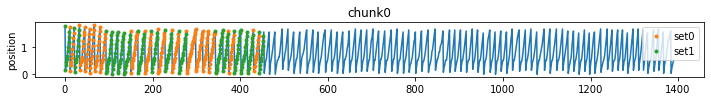

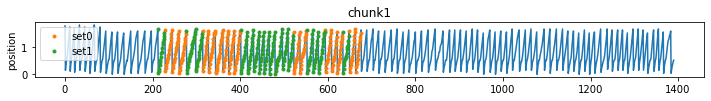

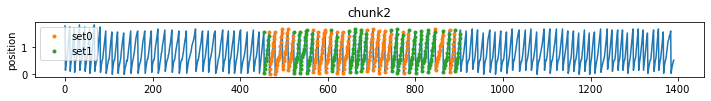

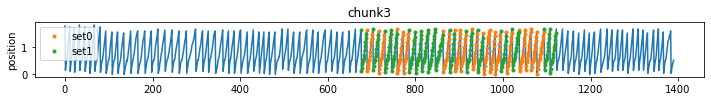

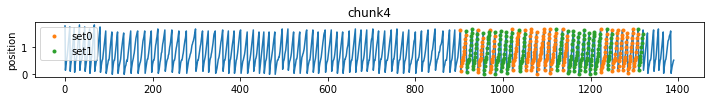

In [17]:
for i in range(len(self.lap_range)):
    plt.figure(figsize=(12,1))
    plt.plot(self.Distance0)
    plt.plot(self.train_idx[i][0],self.Distance0[self.train_idx[i][0]],'.',label='set0')
    plt.plot(self.train_idx[i][1],self.Distance0[self.train_idx[i][1]],'.',label='set1')
    plt.title(f'chunk{i}')
    plt.ylabel('position')
    plt.legend()
    plt.show()

In [ ]:
%matplotlib inline

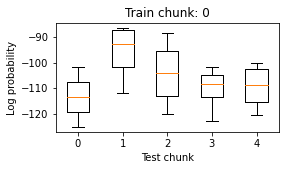

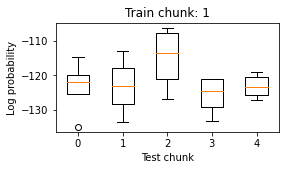

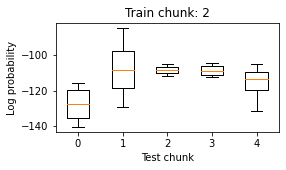

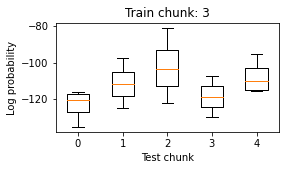

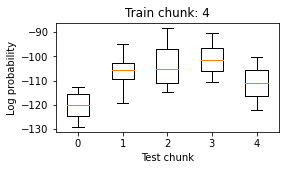

In [19]:
n=len(self.lap_range)
for i in range(n):
    plt.figure(figsize=(4,2))
    plt.boxplot(self.logprob_test[i])
    plt.xticks(np.arange(1,n+1),np.arange(n))
    plt.xlabel('Test chunk')
    plt.ylabel('Log probability')
    plt.title(f'Train chunk: {i}')
    plt.show()

In [ ]:
self.folder

In [ ]:
CalHMM.save_object(self,f'{self.folder}/{self.name}')

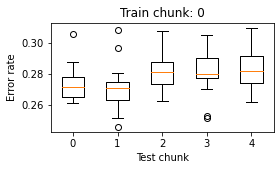

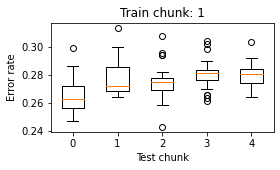

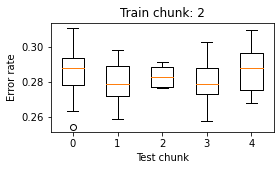

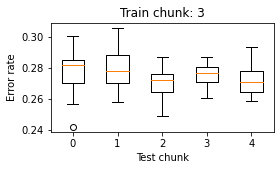

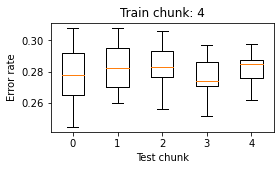

In [13]:
for i in range(n):
    plt.figure(figsize=(4,2))
    plt.boxplot(self.errrate_test[i])
    plt.xticks(np.arange(1,n+1),np.arange(n))
    plt.xlabel('Test chunk')
    plt.ylabel('Error rate')
    plt.title(f'Train chunk: {i}')
    plt.show()

In [50]:
self.estimate_mean()

logprob_test_mean: [[-285.07650301 -248.69453494 -267.73388627 -296.8248324  -317.5469827 ]
 [-255.76182627 -232.81418186 -210.62845749 -270.12892216 -283.56565982]
 [-283.34963047 -230.3663459  -219.62074119 -242.74120186 -267.94943247]
 [-323.2921819  -281.84187063 -241.87754525 -298.75519842 -278.26279166]
 [-341.35857597 -314.98387025 -286.68876596 -283.79271603 -318.81667706]]
errrate_test_mean: [[0.19901733 0.17799759 0.22412856 0.25784952 0.26988156]
 [0.20271275 0.15220268 0.17344463 0.23693555 0.25662061]
 [0.21902077 0.16521079 0.14742899 0.18711886 0.2227502 ]
 [0.23786964 0.20490411 0.18368997 0.20668859 0.21284273]
 [0.26599332 0.23056897 0.20613673 0.19460871 0.19702688]]


In [51]:
if self.win>1:
    logprob_test_mean = self.logprob_test_mean.copy()
    errrate_test_mean = self.errrate_test_mean.copy()
    n = len(self.lap_range)
    for i in range(n-1):
        logprob_test_mean[i,i+1]=None
        logprob_test_mean[i+1,i]=None
        errrate_test_mean[i,i+1]=None
        errrate_test_mean[i+1,i]=None

    tick=[]
    tick.append([f'set{i}' for i in range(n)])
#     plt.figure(figsize=(4,4))
    plt.imshow(logprob_test_mean)
    plt.xlabel('Test set')
    plt.ylabel('Train set')
    plt.xticks(np.arange(n),tick[0])
    plt.yticks(np.arange(n),tick[0])
    plt.title('Loglikehood/Total Number of Frames')
    plt.colorbar()
    plt.show()

    plt.imshow(errrate_test_mean)
    plt.xlabel('Test set')
    plt.ylabel('Train set')
    plt.xticks(np.arange(n),tick[0])
    plt.yticks(np.arange(n),tick[0])
    plt.title('Error Rate')
    plt.colorbar()
    plt.show()

In [ ]:
tick=[]
tick.append([f'set{i}' for i in range(n)])
tick[0]

In [ ]:
if self.win==1:
    logprob_test_mean = self.logprob_test_mean.copy()
    errrate_test_mean = self.errrate_test_mean.copy()

    plt.imshow(logprob_test_mean, cmap='hot')
    plt.xlabel('Test set (laps)')
    plt.ylabel('Train set (laps)')
    plt.xticks(np.arange(self.n_chunks+1)-0.5,np.arange(self.n_chunks+1)*self.n_laps_perchunk)
    plt.yticks(np.arange(self.n_chunks+1)-0.5,np.arange(self.n_chunks+1)*self.n_laps_perchunk)
    plt.title('Loglikehood/Total Number of Frames')
    plt.colorbar()
    plt.show()

    plt.imshow(errrate_test_mean, cmap='hot')
    plt.xlabel('Test set (laps)')
    plt.ylabel('Train set (laps)')
    plt.xticks(np.arange(self.n_chunks+1)-0.5,np.arange(self.n_chunks+1)*self.n_laps_perchunk)
    plt.yticks(np.arange(self.n_chunks+1)-0.5,np.arange(self.n_chunks+1)*self.n_laps_perchunk)
    plt.title('Error Rate')
    plt.colorbar()
    plt.show()

## Test HMM failure

In [ ]:
import hmmlearn.hmm

In [ ]:
imp.reload(hmmlearn.hmm)

In [ ]:
self = hcv.datainfo(folder, timebin, name, n_chunks, k, win,normalize=True)
train_lap, train_lap_len, train_idx = self.separate_chunk_set()
Trace_train = self.Trace0[train_idx[3][0],:]
Distance_train = self.Distance0[train_idx[3][0]]
len_train = train_lap_len[3][0]

In [ ]:
Trace_train = self.Trace_train.copy()
Distance_train = self.Distance_train.copy()
len_train = self.len_train.copy()

### Run HMM one iteration at a time

In [ ]:
def check_clustering(origin, Trace_train, len_train):
    _, posterior_states = origin.score_samples(Trace_train, len_train)
    pre_state = np.argmax(posterior_states, axis=1)
    value, count = np.unique(pre_state, return_counts=True)
    print(f'Decoded state after first iteration: \nstate: {value}\noccurrence: {count}')

In [ ]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20, verbose=True, n_iter=1)
origin, stats = origin.fit(Trace_train, len_train, first=True)
print([origin.transmat_.sum(axis=1), stats['trans'].sum(axis=1)])
check_clustering(origin, Trace_train, len_train)

In [ ]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20, verbose=True, n_iter=1)
origin, stats = origin.fit(Trace_train, len_train, first=True)
print([origin.transmat_.sum(axis=1), stats['trans'].sum(axis=1)])
check_clustering(origin, Trace_train, len_train)

In [ ]:
for i in range(10):
    pre_stats = stats.copy()
    pre_trans = origin.transmat_.copy()
    origin, stats = origin.fit(Trace_train, len_train, first=False)
    print([np.where(origin.transmat_.sum(axis=1)==0), np.where(stats['trans'].sum(axis=1)==0)])
    check_clustering(origin, Trace_train, len_train)

### Try to figure out why one state salient

In [12]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20, verbose=True, n_iter=20)
origin.fit(self.Trace_train, self.len_train)

         1      -23889.9311             +nan
         2      -19522.0669       +4367.8642
         3      -18848.7714        +673.2956
         4      -18465.0760        +383.6954
         5      -18316.4056        +148.6704
         6      -18222.7710         +93.6346
         7      -18180.8617         +41.9092
         8      -18186.2064          -5.3446
The log probability of the last iteration decreased; reverting to previous state


(PoissonHMM(n_components=20, n_iter=20, verbose=True),
 {'nobs': 16,
  'start': array([1.19999629e+001, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         2.57164326e-262, 0.00000000e+000, 1.65326441e-122, 0.00000000e+000,
         0.00000000e+000, 2.51017162e-274, 0.00000000e+000, 4.40895570e-029,
         0.00000000e+000, 1.00003713e+000, 1.63041663e-320, 0.00000000e+000,
         2.00000000e+000, 1.05842413e-294, 2.08432006e-296, 1.76911097e-095]),
  'trans': array([[9.96058904e+001, 1.00000000e+000, 2.00000000e+000,
          3.01732991e-046, 1.48453469e+000, 1.00000000e+000,
          5.79644673e-027, 1.00000000e+000, 1.00000000e+000,
          1.00000000e+000, 2.00000000e+000, 1.08907257e+001,
          1.00000000e+000, 4.00552403e+000, 2.43224293e-135,
          0.00000000e+000, 1.22796397e+001, 4.00000000e+000,
          3.28542659e-134, 9.99999999e-001],
         [1.00000000e+000, 3.00000000e+000, 4.16236761e-197,
          4.75479215e-121, 2.00553022e-089, 1.39625732

In [22]:
_,pp = origin.score_samples(self.Trace_train)
pp.shape,np.unique(np.argmax(pp,axis=1),return_counts=True)

((256, 20),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19]),
  array([153,   6,   2,   1,   5,   2,   2,   1,   1,   1,   2,  24,   2,
          13,   1,   1,  28,   3,   5,   3])))

In [14]:
dec_state=np.argmax(pp,axis=1)
_,c=np.unique(dec_state,return_counts=True)

In [15]:
np.argmax(c),origin.means_.max(axis=1)[np.argmax(c)]

(0, 0.970654282178812)

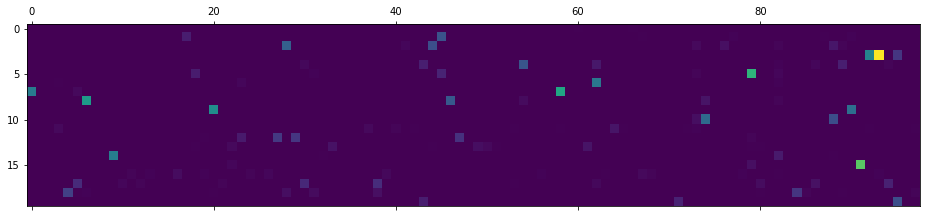

In [16]:
plt.matshow(origin.means_)

In [26]:
origin.means_.shape

(20, 91)

In [18]:
origin.means_.max(axis=1)

array([  0.97065428,  59.66666666,  70.5       , 233.        ,
        61.2       , 151.5       ,  92.49999994, 139.        ,
       128.        , 114.        ,  81.        ,  12.75201282,
        38.5       ,  12.00151751,  99.        , 173.        ,
         7.33740144,  29.5       ,  44.4       ,  55.99999759])

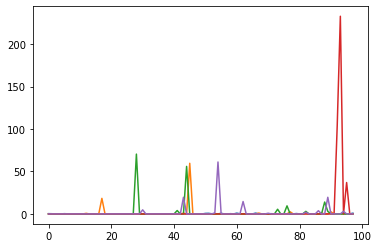

In [17]:
plt.plot(origin.means_[:5,:].T)
plt.show()

In [49]:
plt.plot(self.Distance_train)
plt.plot(Decoded_pos,'.')

In [26]:
self.Trace_train.shape, self.Trace_train.max(axis=1).shape, self.Trace_train.std(axis=1).shape

((256, 98), (256,), (256,))

In [28]:
%matplotlib

Using matplotlib backend: MacOSX


In [ ]:
max_acrosstime = self.Trace_train.max(axis=1)
ratio = max_acrosstime/self.Trace_train.std(axis=1)

In [43]:
np.where(max_acrosstime<2)[0].shape

(59,)

In [69]:
self.name, self.folder

('Spike', '/Users/daiyiluo/Downloads/KQ086_210112/spks10')

In [70]:
print(f'CA3 third day, {self.name}')
print(f'total number of frames: {self.Trace0.shape[0]}')
print(f'number of frames when no neuron fires: {np.where(self.Trace0.std(axis=1)==0)[0].size}')

CA3 third day, Spike
total number of frames: 1391
number of frames when no neuron fires: 258


In [37]:
self.Trace_train[0,:].shape,np.std(self.Trace_train[0,:])

((98,), 0.0)

In [38]:
self.Trace_train[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
ratio

array([       nan,        nan, 9.95039242, 9.94801475, 9.88824385,
       9.82513381, 9.95039242, 9.93384512,        nan, 9.95039242,
              nan, 9.18018453, 9.95039242,        nan, 8.63376552,
              nan, 9.85703739, 9.74045656, 8.10842411, 9.95039242,
       9.95039242, 9.95039242, 8.95896645, 9.95039242,        nan,
       9.75013322, 8.10634031, 9.95039242, 7.29681274, 9.91762257,
       9.2931615 , 9.95039242,        nan, 9.46910241, 6.56101707,
              nan, 6.72659255, 9.79322925, 9.86463384,        nan,
              nan, 9.87988498, 9.95039242, 9.66675028, 9.71754936,
       7.53714923, 9.95039242, 8.19873191, 9.92164943, 9.95039242,
       8.93683075,        nan,        nan,        nan,        nan,
              nan, 9.95039242, 6.40632849, 6.87037116, 9.95039242,
              nan,        nan, 9.95039242, 8.57701047, 9.02294832,
       8.77306627,        nan, 8.1951717 ,        nan,        nan,
              nan, 9.95039242, 9.95039242, 9.95039242, 9.95039